In [2]:
#importo las librerias necesarias
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from collections import deque
import heapq

In [3]:
#aca leemos el data frame
data_frame = pd.read_csv('Vuelos_100_Registros_sin_segundos_v2.csv')
#decido hacer una copia para trabajr en este y no mover ningun dato original
# y asi poder experimentar con el sin perder o mopdificar tipos de datos
df = data_frame.copy()
df.head()
#df

,ID,Origen,Destino,Fecha_Salida,Hora_Salida_Origen,Fecha_Llegada,Hora_Llegada_Destino,Precio_Vuelo
0,FLIGHT0001,Paris,Lisbon,2024-07-04,11:41,2024-07-04,07:13,584
1,FLIGHT0002,Madrid,Mexico City,2024-07-11,12:02,2024-07-11,19:37,1488
2,FLIGHT0003,Paris,Barcelona,2024-03-07,14:31,2024-03-07,03:18,118
3,FLIGHT0004,Miami,Madrid,2024-03-31,06:27,2024-03-31,17:16,704
4,FLIGHT0005,Barcelona,New York,2024-01-10,01:53,2024-01-10,20:32,297


In [4]:
#creacion de los grafos
grafo_tiempo = nx.DiGraph()
grafo_costo = nx.DiGraph()
#aca puse _, por que asi ignora el indice y se puede iterar mejor por que 
for _, row in df.iterrows():
    #aca asigno un valor para despues con la ayuda de la libreria networkx asignarlas al grafo
    origen = row['Origen']
    destino = row['Destino']
    
    if tiempo_logico(row['Fecha_Salida'], row['Fecha_Llegada'], row['Hora_Salida_Origen'], row['Hora_Llegada_Destino']) == True:
        tiempos = tiempos_de_vuelo(row['Fecha_Salida'], row['Fecha_Llegada'], row['Hora_Salida_Origen'], row['Hora_Llegada_Destino'])
        #aca se pone nodo 1como origen y destino como nodo2 osea el final y en medio pongo tiempos de vuelo osea el borde o el palito
        grafo_tiempo.add_edge(origen, destino, tiempo = tiempos)

#ahora aca con la misma tecnica creamos el de costo
for _, row in df.iterrows():
    #aca asigno un valor para despues con la ayuda de la libreria networkx asignarlas al grafo
    origen = row['Origen']
    destino = row['Destino']
    precio = row['Precio_Vuelo']
    if tiempo_logico(row['Fecha_Salida'], row['Fecha_Llegada'], row['Hora_Salida_Origen'], row['Hora_Llegada_Destino']) == True:
        #aca se pone nodo 1como origen y destino como nodo2 osea el final y en medio pongo costos osea el borde o el palito
        grafo_costo.add_edge(origen, destino, costos = precio)


grafo_dic_tiempo = {}

for nodo, contenido in grafo_tiempo.adjacency():
    grafo_dic_tiempo[nodo] = dict(contenido)

grafo_dic_costo = {}

for nodo, contenido in grafo_costo.adjacency():
    grafo_dic_costo[nodo] = dict(contenido)

NameError: name 'tiempo_logico' is not defined


elija una opcion valida

para salir apriete 9
1: dibujar grafo de costo
2: dibujar grafo de tiempo
3: Encontrar todas las rutas por amplitud
4: Encontrar todas las rutas por profundiad
5: Encontrar ruta por menor tiempo
6: Encontrar ruta por menor costo
7: todas las rutas acia el destino elejido


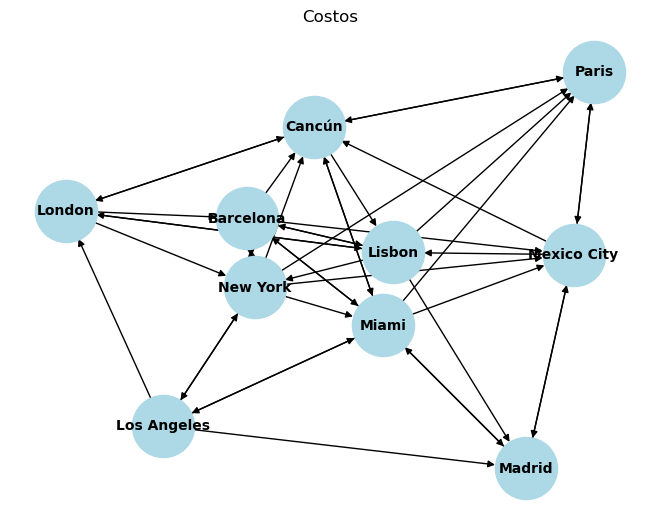


elija una opcion valida

para salir apriete 9
1: dibujar grafo de costo
2: dibujar grafo de tiempo
3: Encontrar todas las rutas por amplitud
4: Encontrar todas las rutas por profundiad
5: Encontrar ruta por menor tiempo
6: Encontrar ruta por menor costo
7: todas las rutas acia el destino elejido

Gracias por usar nuestro buscador


In [ ]:
'''MAIN'''
menu()

In [ ]:
# funciones 

def tiempos_de_vuelo(f_salida, f_llegada, h_salida, h_llegada):
    salida = datetime.strptime(f'{f_salida} {h_salida}', '%Y-%m-%d %H:%M')
    llegada = datetime.strptime(f'{f_llegada} {h_llegada}', '%Y-%m-%d %H:%M')
    tiempo = ((llegada-salida).total_seconds()/3600)
    return tiempo
def tiempo_logico(f_salida, f_llegada, h_salida, h_llegada):
    salida = datetime.strptime(f'{f_salida} {h_salida}', '%Y-%m-%d %H:%M')
    llegada = datetime.strptime(f'{f_llegada} {h_llegada}', '%Y-%m-%d %H:%M')

    if llegada >= salida:
        return True
    else:
        return False
def dias_y_horas(hora):
    tiempo = timedelta(hours=hora)
    dias = tiempo.days
    hora = tiempo.seconds /3600
    return dias, hora 
def menu():
    while True :
        #aca defino las opciones del menu 
        print('\nelija una opcion valida\n')
        print('para salir apriete 9')
        print('1: dibujar grafo de costo')
        print('2: dibujar grafo de tiempo')
        print('3: Encontrar todas las rutas por amplitud')
        print('4: Encontrar todas las rutas por profundiad')
        print('5: Encontrar ruta por menor tiempo')
        print('6: Encontrar ruta por menor costo')
        print('7: todas las rutas acia el destino elejido')
        opcion = input()

        if opcion == '9':
            print('\nGracias por usar nuestro buscador')
            break
        elif opcion == '1':
            dibujar_grafos(grafo_costo, 'Costos')
        elif opcion == '2':
            dibujar_grafos(grafo_tiempo, 'Tiempo')
        elif opcion == '3':
            print('-------------------------')
            print('busqueda de amplitud')
            condicion, lugar_d_partida, lugar_d_destino = verificador_ortografia()
            print()

            if condicion == False and lugar_d_destino == lugar_d_partida:
                print(f'Ya estas en el destino {lugar_d_destino} asi que el tiempo y dinero son 0\n')

            if condicion == True:
                Rutas = busqueda_amplitud(grafo_dic_tiempo, lugar_d_partida, lugar_d_destino)
                for lista in Rutas:
                    costo, tiempo = tiempo_y_horas(lista)
                    dia, hora = dias_y_horas(tiempo)
                    print(f'{"->".join(lista)}, dinero necesario ${costo} y dura {round(tiempo, 2)} horas, o {dia} dias y {round(hora, 2)} horas')
            else:
                print('Volviendo al menu\n')
        elif opcion == '4':
            print('-------------------------')
            print('busqueda de profundidad')
            condicion, lugar_d_partida, lugar_d_destino = verificador_ortografia()
            print()

            if condicion == False and lugar_d_destino == lugar_d_partida:
                print(f'Ya estas en el destino {lugar_d_destino} asi que el tiempo y dinero son 0\n')

            if condicion == True:
                Rutas = busqueda_profundidad(grafo_dic_tiempo, lugar_d_partida, lugar_d_destino)
                for lista in Rutas:
                    costo, tiempo = tiempo_y_horas(lista)
                    dia, hora = dias_y_horas(tiempo)
                    print(f'{"->".join(lista)}, dinero necesario ${costo} y dura {round(tiempo, 2)} horas, o {dia} dias y {round(hora, 2)} horas')
            else:
                print('Volviendo al menu\n')
        elif opcion == '5':
            print('-------------------------')
            print('busqueda de la ruta que tiene menor tiempo')
            condicion, lugar_d_partida, lugar_d_destino = verificador_ortografia()
            print()

            if condicion == False and lugar_d_destino == lugar_d_partida:
                print(f'Ya estas en el destino {lugar_d_destino} asi que el tiempo y dinero son 0\n')

            if condicion == True:
                costo_minimo, camino_minimo = costo_uniforme(lugar_d_partida, lugar_d_destino, grafo_dic_tiempo, 'tiempo')
                c_cam = []
                c_cam.append(camino_minimo)

                for lista in c_cam:
                    costo, tiempo = tiempo_y_horas(lista)
                    dia, hora = dias_y_horas(tiempo)
                    print(f'{"->".join(lista)}, dinero necesario ${costo} y dura {round(tiempo, 2)} horas, o {dia} dias y {round(hora, 2)} horas')
                # Imprimir el costo mínimo y el camino
                if costo_minimo != float('inf'):
                    print(f"La ruta con menor tiempo desde {lugar_d_partida} hasta {lugar_d_destino} es: {round(costo_minimo, 2)} horas")
                    print(f"El camino mínimo es: {' -> '.join(camino_minimo)}")
                else:
                    print(f"No se encontró un camino desde {lugar_d_destino} hasta {lugar_d_destino}")
            else:
                print('Volviendo al menu\n')
        elif opcion == '6':
            print('-------------------------')
            print('busqueda de la ruta que tiene menor costo')
            condicion, lugar_d_partida, lugar_d_destino = verificador_ortografia()
            print()

            if condicion == False and lugar_d_destino == lugar_d_partida:
                print(f'Ya estas en el destino {lugar_d_destino} asi que el tiempo y dinero son 0\n')

            if condicion == True:
                costo_minimo, camino_minimo = costo_uniforme(lugar_d_partida, lugar_d_destino, grafo_dic_costo, 'costos')
                c_cam = []
                c_cam.append(camino_minimo)

                for lista in c_cam:
                    costo, tiempo = tiempo_y_horas(lista)
                    dia, hora = dias_y_horas(tiempo)
                    print(f'{"->".join(lista)}, dinero necesario ${costo} y dura {round(tiempo, 2)} horas, o {dia} dias y {round(hora, 2)} horas')
                # Imprimir el costo mínimo y el camino
                if costo_minimo != float('inf'):
                    print(f"La ruta con menor costo desde {lugar_d_partida} hasta {lugar_d_destino} es: ${costo_minimo}")
                    print(f"El camino mínimo es: {' -> '.join(camino_minimo)}")
                else:
                    print(f"No se encontró un camino desde {lugar_d_destino} hasta {lugar_d_destino}")
            else:
                print('Volviendo al menu\n')
        elif opcion == '7':
            #costo unforme tiempo
            condicion, lugar_d_partida, lugar_d_destino = verificador_ortografia()
            print()

            if condicion == False and lugar_d_destino == lugar_d_partida:
                print(f'Ya estas en el destino {lugar_d_destino} asi que el tiempo y dinero son 0\n')

            if condicion == True:
                print('-------------------------')
                print('busqueda de la ruta que tiene menor costo')

                cos_minimo, c_minimo = costo_uniforme(lugar_d_partida, lugar_d_destino, grafo_dic_costo, 'costos')
                c_c = []
                c_c.append(c_minimo)

                for lista in c_c:
                    costo, tiempo = tiempo_y_horas(lista)
                    dia, hora = dias_y_horas(tiempo)
                    print(f'{"->".join(lista)}, dinero necesario ${costo} y dura {round(tiempo, 2)} horas, o {dia} dias y {round(hora, 2)} horas')
                # Imprimir el costo mínimo y el camino
                if cos_minimo != float('inf'):
                    print(f"La ruta con menor costo desde {lugar_d_partida} hasta {lugar_d_destino} es: ${cos_minimo}")
                    print(f"El camino mínimo es: {' -> '.join(c_minimo)}")
                else:
                    print(f"No se encontró un camino desde {lugar_d_destino} hasta {lugar_d_destino}")

                print('-------------------------')
                print('busqueda de la ruta que tiene menor tiempo')
                
                costo_minimo, camino_minimo = costo_uniforme(lugar_d_partida, lugar_d_destino, grafo_dic_tiempo, 'tiempo')
                c_cam = []
                c_cam.append(camino_minimo)

                for lista in c_cam:
                    costo, tiempo = tiempo_y_horas(lista)
                    dia, hora = dias_y_horas(tiempo)
                    print(f'{"->".join(lista)}, dinero necesario ${costo} y dura {round(tiempo, 2)} horas, o {dia} dias y {round(hora, 2)} horas')
                # Imprimir el costo mínimo y el camino
                if costo_minimo != float('inf'):
                    print(f"La ruta con menor tiempo desde {lugar_d_partida} hasta {lugar_d_destino} es: {round(costo_minimo, 2)} horas")
                    print(f"El camino mínimo es: {' -> '.join(camino_minimo)}")
                else:
                    print(f"No se encontró un camino desde {lugar_d_destino} hasta {lugar_d_destino}")
                
                print('-------------------------')
                print('Todas las rutas\n')

                print('Por amplitud')
                Rutas = busqueda_amplitud(grafo_dic_tiempo, lugar_d_partida, lugar_d_destino)
                for lista in Rutas:
                    costo, tiempo = tiempo_y_horas(lista)
                    dia, hora = dias_y_horas(tiempo)
                    print(f'{"->".join(lista)}, dinero necesario ${costo} y dura {round(tiempo, 2)} horas, o {dia} dias y {round(hora, 2)} horas')
                print('Por profundidad')
                Rutas = busqueda_profundidad(grafo_dic_tiempo, lugar_d_partida, lugar_d_destino)
                for lista in Rutas:
                    costo, tiempo = tiempo_y_horas(lista)
                    dia, hora = dias_y_horas(tiempo)
                    print(f'{"->".join(lista)}, dinero necesario ${costo} y dura {round(tiempo, 2)} horas, o {dia} dias y {round(hora, 2)} horas')
                
            else:
                print('Volviendo al menu\n')
        else:
            print('opcion invalida intente de nuevo\n')
def nice_write_origen(input):
    contador = 0
    copia_d_columna = df[['Origen', 'Destino']].copy()
    tam = copia_d_columna.shape[0]

    for _, row in copia_d_columna.iterrows():
        contador += 1

        if row['Origen'] == input:
            return True

    if contador == tam:
        return False 
def nice_write_destino(input):
    contador = 0
    copia_d_columna = df[['Origen', 'Destino']].copy()
    tam = copia_d_columna.shape[0]

    for _, row in copia_d_columna.iterrows():
        contador += 1

        if row['Destino'] == input:
            return True

    if contador == tam:
        return False
def verificador_ortografia():
    end = False  
    lugar_d_partida = ''
    lugar_d_destino = ''

    while True:
        print('\n¿De dónde partes?')
        lugar_d_partida = input()

        if nice_write_origen(lugar_d_partida) == True:  
            while True:
                print('\n¿Cuál es tu destino?')
                lugar_d_destino = input()

                if nice_write_destino(lugar_d_destino) == True:  

                    if lugar_d_partida == lugar_d_destino:
                        return False, lugar_d_partida, lugar_d_destino
                    
                    return True, lugar_d_partida, lugar_d_destino
                else:  
                    print('Está mal escrito, inténtalo de nuevo. Para salir oprime 9,para repetir pulsa cualquier tecla')
                    opcion3 = input()
                if opcion3 == '9':  
                    end = True  
                    return False, '', 'a'
        else:  
            print('Está mal escrito, inténtalo de nuevo. Para salir oprime 9, si no, oprime cualquier tecla.')
            opcion2 = input()

            if opcion2 == '9':  
                return False, '', 'a'
                end = True
                break
        if end == True:  # Si se ha marcado que se debe salir
            print('Volviendo al menú.')
            break
def dibujar_grafos(grafo,titulo):
    pos = nx.spring_layout(grafo)
    nx.draw(grafo, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(grafo, 'weigth')
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels)

    plt.title(titulo)
    plt.show()
'''tiempo horas'''
def tiempo_y_horas(ruta):
    horas = 0
    dinero = 0

    for i in range(len(ruta)-1):
        ori = ruta[i]
        dest = ruta[i + 1]
        vuelo_actual = df[(df['Origen'] == ori) & (df['Destino'] == dest)]

        if not vuelo_actual.empty:
            dinero += vuelo_actual['Precio_Vuelo'].values[0]
            horas += tiempos_de_vuelo(vuelo_actual['Fecha_Salida'].values[0], 
                                    vuelo_actual['Fecha_Llegada'].values[0], 
                                    vuelo_actual['Hora_Salida_Origen'].values[0], 
                                    vuelo_actual['Hora_Llegada_Destino'].values[0])
    return dinero, horas
def busqueda_amplitud(grafo, inicio, objetivo):
    visitados = set()
    rutas=[]
    cola = deque([(inicio, [inicio])])

    while cola:
        nodo_actual, camino = cola.popleft()
        if nodo_actual == objetivo:
            rutas.append(camino)
        elif nodo_actual not in visitados:
            visitados.add(nodo_actual)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
                    nueva_ruta = camino + [vecino]
                    cola.append((vecino, nueva_ruta))
    if not rutas:
        return None
    else:
        return rutas
    
def busqueda_profundidad(grafo, inicio, objetivo, visitados=None, camino=None, caminos_encontrados=None):
    
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = []
    if caminos_encontrados is None:
        caminos_encontrados = []

    camino.append(inicio)
    visitados.add(inicio)

    if inicio == objetivo:
        caminos_encontrados.append(camino.copy())
    else:
        for vecino in grafo[inicio]:
            if vecino not in visitados:
                busqueda_profundidad(grafo, vecino, objetivo, visitados, camino, caminos_encontrados)

    camino.pop()
    visitados.remove(inicio)

    return caminos_encontrados
def costo_uniforme(inicio, objetivo, grafo, costo_o_tiempo):
    cola_prioridad = []
    heapq.heappush(cola_prioridad, (0, inicio, [inicio]))  
    visitados = set()
    
    while cola_prioridad:
        costo_actual, nodo_actual, camino = heapq.heappop(cola_prioridad)
        if nodo_actual == objetivo:
            return costo_actual, camino
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            for vecino, costo in grafo[nodo_actual].items():
                if vecino not in visitados: # Visitamos solo los vecinos NO visitados
                    nuevo_costo = costo_actual + costo[costo_o_tiempo]
                    nuevo_camino = camino + [vecino]
                    heapq.heappush(cola_prioridad, (nuevo_costo, vecino, nuevo_camino))

    return float('inf'), []